In [75]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy import stats
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn import preprocessing
import matplotlib.cm as cm
import seaborn as sns

In [76]:
day_list_long = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
day_list_short = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
day_list_Feb = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
x_label = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        for hour in range(0,24):
            hour = str(hour)
            key = int('21'+ month + day + hour)
            key = str(key)
            x_label.append(key)

In [77]:
Kyoto_station_mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Kyotostation.npy'
Kyoto_station_tweets_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Kyotostation_users.npy'

Arashi_mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Arashiyama_3zi_2022.npy'
Arashi_tweets_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Arashiyama_users.npy'

High_mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Highclass_3zi_2022.npy'
High_tweets_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Highclass_users.npy'

Kinkaku_mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Kinkaku_3zi_2022.npy'
Kinkaku_tweets_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Kinkaku_users.npy'

Kiyomizu_mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Kiyomizu_3zi_2022.npy'
Kiyomizu_tweets_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Kiyomizu_users.npy'

Lowclass_mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Lowclass_3zi_2022.npy'
Lowclass_tweets_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Lowclass_users.npy'

Nizyou_mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Nizyou_3zi_2022.npy'
Nizyou_tweets_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Nizyou_users.npy'

Touzi_mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Touzi_3zi_2022.npy'
Touzi_tweets_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Touzi_users.npy'

list_mobile = [Arashi_mobile_PATH, High_mobile_PATH, Kinkaku_mobile_PATH, Kiyomizu_mobile_PATH, Lowclass_mobile_PATH, Nizyou_mobile_PATH, Touzi_mobile_PATH, Kyoto_station_mobile_PATH]
list_twitter = [Arashi_tweets_PATH, High_tweets_PATH, Kinkaku_tweets_PATH, Kiyomizu_tweets_PATH, Lowclass_tweets_PATH, Nizyou_tweets_PATH, Touzi_tweets_PATH, Kyoto_station_tweets_PATH]
list_key = ['Arashiyama','High_class','Kinkaku_tmple','Kiyomizu_temple','middle_class','Nizyou','Touzi','Kyotostation']

mobile = np.load(Kiyomizu_mobile_PATH)
tweets = np.load(Kiyomizu_tweets_PATH)

mobile_flatten = mobile.flatten()
tweets_flatten = tweets.flatten()

mobile_asa = mobile[:,0:7]
mobile_hiru = mobile[:,8:15]
mobile_ban = mobile[:,16:23]

tweets_asa = tweets[:,0:7]
tweets_hiru = tweets[:,8:15]
tweets_ban = tweets[:,16:23]

In [78]:
mobile_flatten_stand =preprocessing.scale(mobile_flatten)
tweets_flatten_stand = preprocessing.scale(tweets_flatten)

In [79]:
fig = go.Figure(data=[
    go.Scatter(x=x_label, y=mobile_flatten_stand, name="mobile"),
    go.Scatter(x=x_label, y=tweets_flatten_stand, name = 'tweets')
])
fig.show()

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



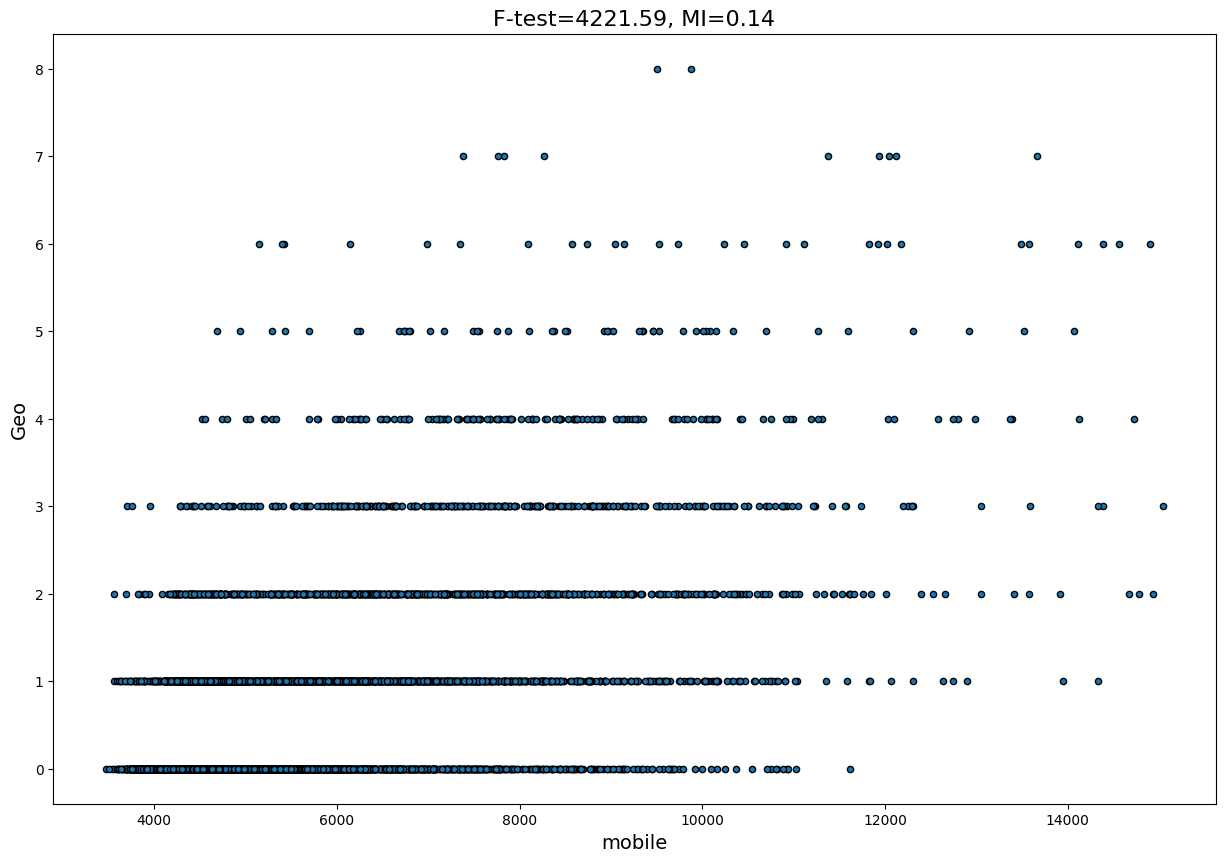

In [80]:
X = mobile_flatten.reshape(-1,1)
y = tweets_flatten.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))
a, b = np.polyfit(X[:,0], y, 1)
# フィッティング直線
# y2 = a * X + b
# plt.plot(X, y2,color='black')
#.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
plt.scatter(X[:, 0], y, edgecolor="black", s=20)
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



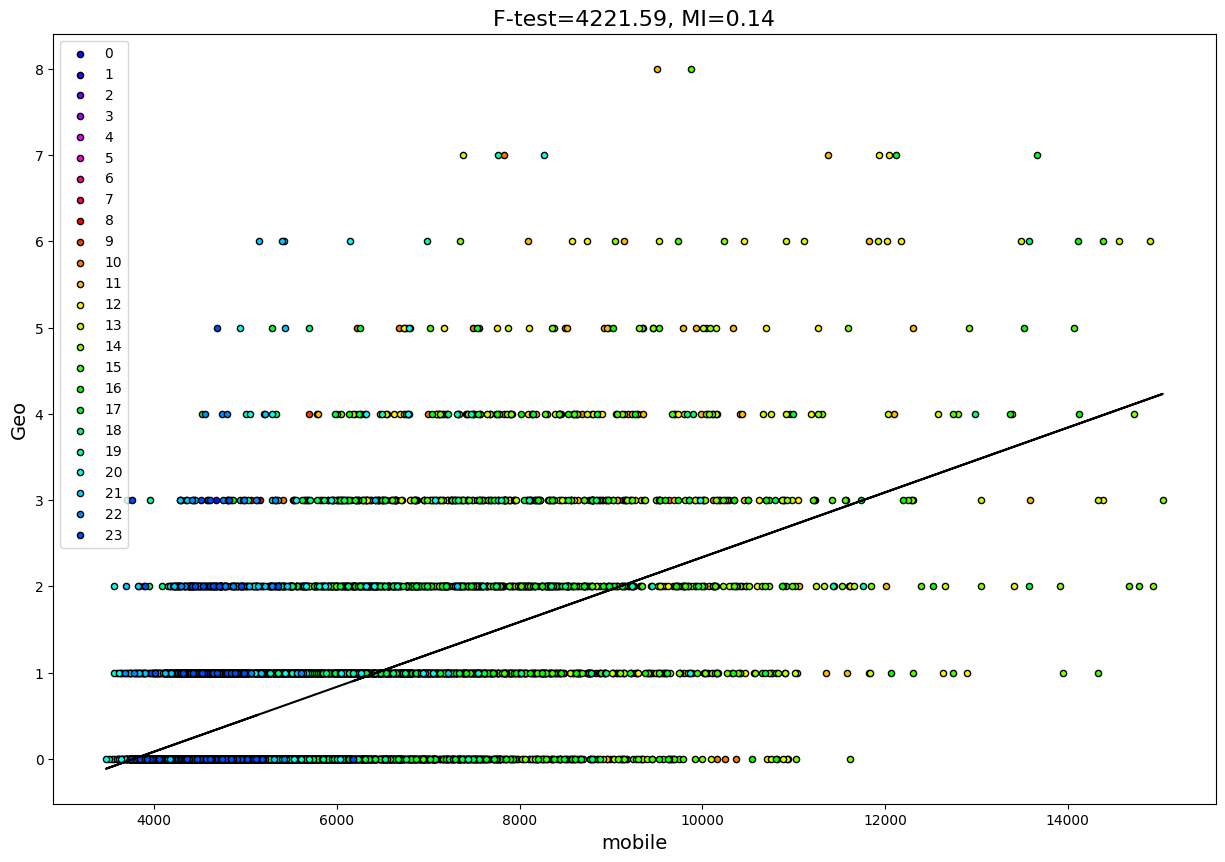

In [81]:
X = mobile_flatten.reshape(-1,1)
y = tweets_flatten.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))
a, b = np.polyfit(X[:,0], y, 1)
#フィッティング直線
y2 = a * X + b
plt.plot(X, y2,color='black')
for i in range(0,24):
    plt.scatter(mobile[:,i], tweets[:,i], edgecolor="black", s=20, color=cm.hsv((((i+16)%24)/24)), label=str(i))
plt.legend()
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



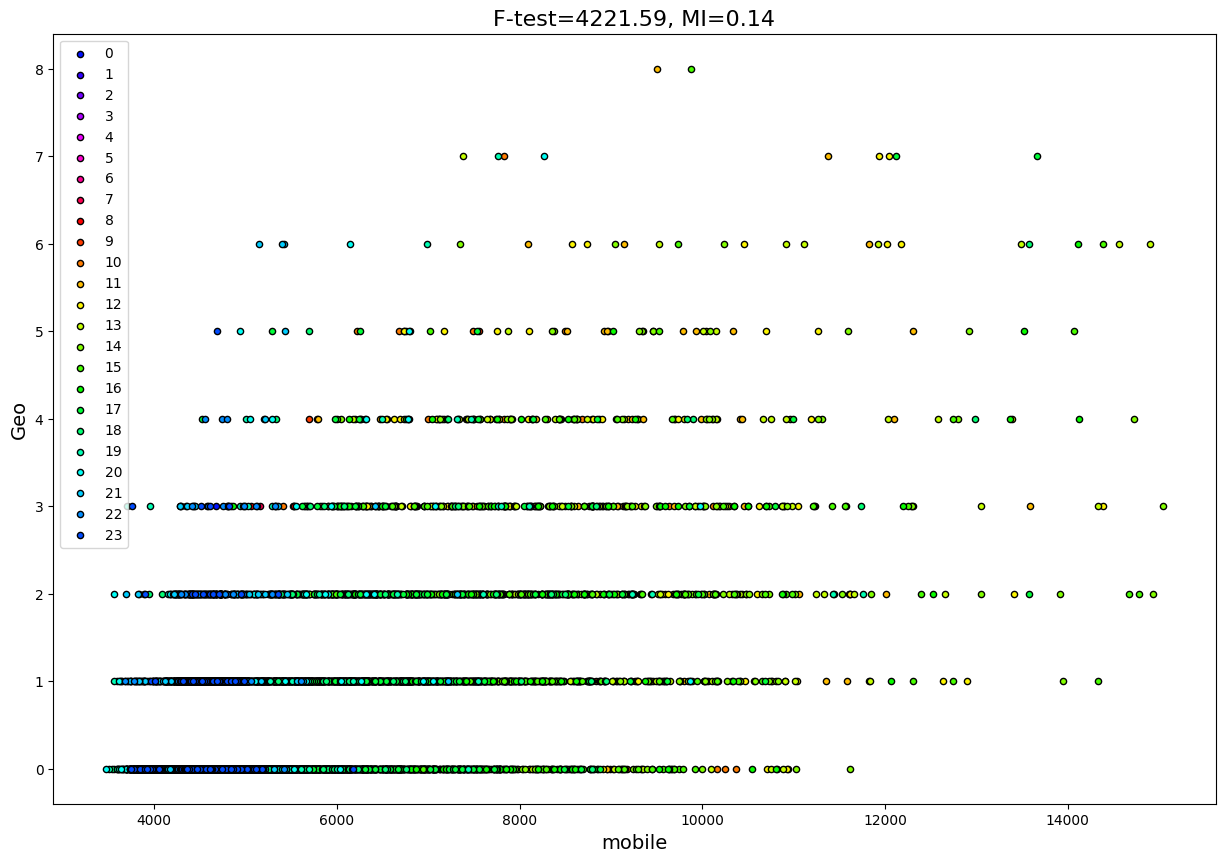

In [82]:
X = mobile_flatten.reshape(-1,1)
y = tweets_flatten.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))
a, b = np.polyfit(X[:,0], y, 1)
#フィッティング直線
#y2 = a * X + b
#plt.plot(X, y2,color='black')
for i in range(0,24):
        plt.scatter(mobile[:,i], tweets[:,i], edgecolor="black", s=20, color=cm.hsv((((i+16)%24)/24)), label=str(i))
plt.legend()
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



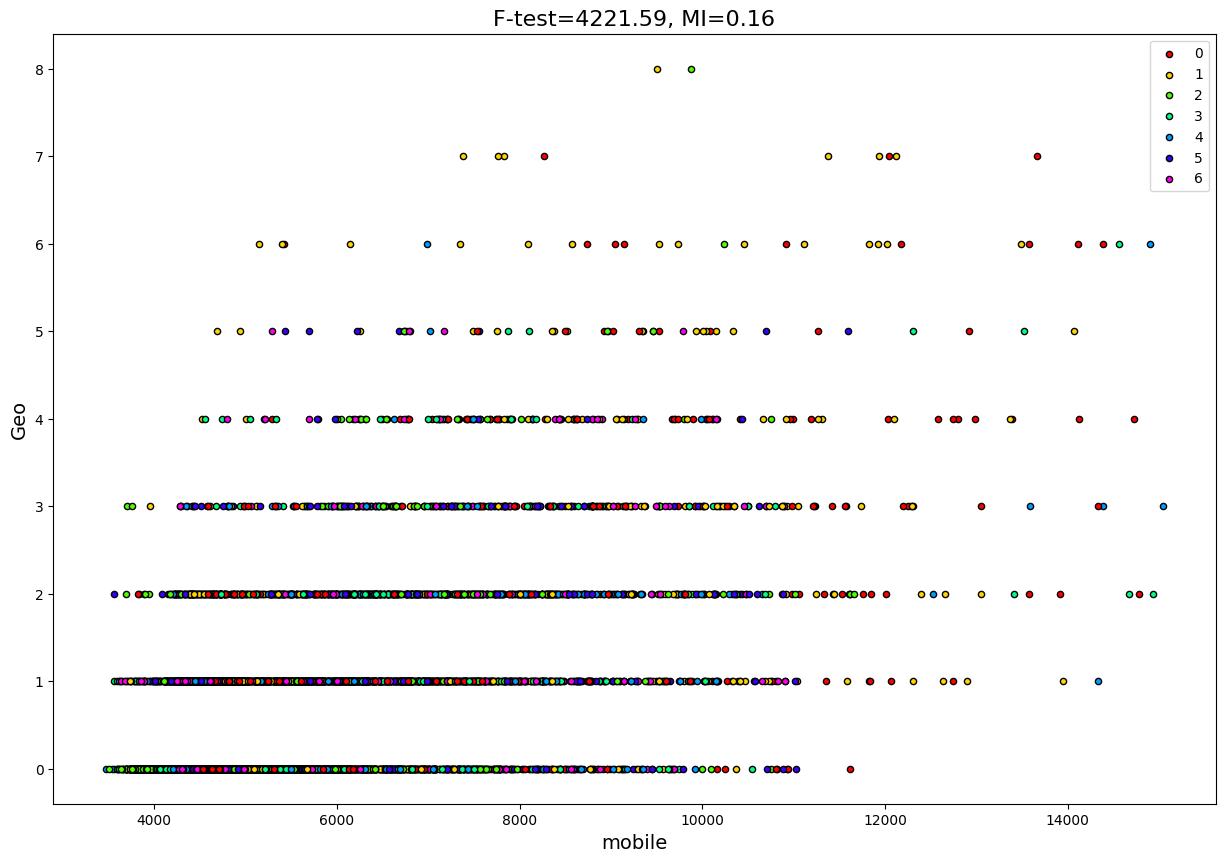

In [83]:
X = mobile_flatten.reshape(-1,1)
y = tweets_flatten.reshape(-1,1)
f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))
a, b = np.polyfit(X[:,0], y, 1)
# フィッティング直線
# y2 = a * X + b
# plt.plot(X, y2,color='black')
#.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
for i in range(0,365):
    if i<7:
        plt.scatter(mobile[i,:], tweets[i,:], edgecolor="black", s=20, color=cm.hsv((i%7)/7),label = str(i%7))
    else:
        plt.scatter(mobile[i,:], tweets[i,:], edgecolor="black", s=20, color=cm.hsv((i%7)/7))
plt.legend()
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()

In [84]:
data = np.stack([tweets_flatten, mobile_flatten])

In [85]:
col = ['tweets_num', 'mobile']

In [86]:
df = pd.DataFrame(data = data.T, columns=col)

In [87]:
df

,tweets_num,mobile
0,1,5133
1,0,4633
2,1,4630
3,1,4420
4,0,4459
...,...,...
8755,3,5028
8756,1,5051
8757,0,5309
8758,1,5603


In [88]:
max(df['tweets_num'])

8

In [89]:
ticks_l = []
ticks_r = []
for i in range(0, max(df['tweets_num'])+1):
    ticks_l.append(i)
    ticks_r.append(i)

In [90]:
a, b = np.polyfit(tweets_flatten, mobile_flatten, 1)

In [91]:
np.array(ticks_l)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [94]:
a, b = np.polyfit(tweets_flatten, mobile_flatten, 1)
y2 = a * np.array(ticks_l) + b
data = pd.DataFrame(np.stack((ticks_l, y2)).T, columns=['Tweets_num', 'population'])

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0.5, 1.0, 'Arashi F-test=4221.59, MI=0.15')

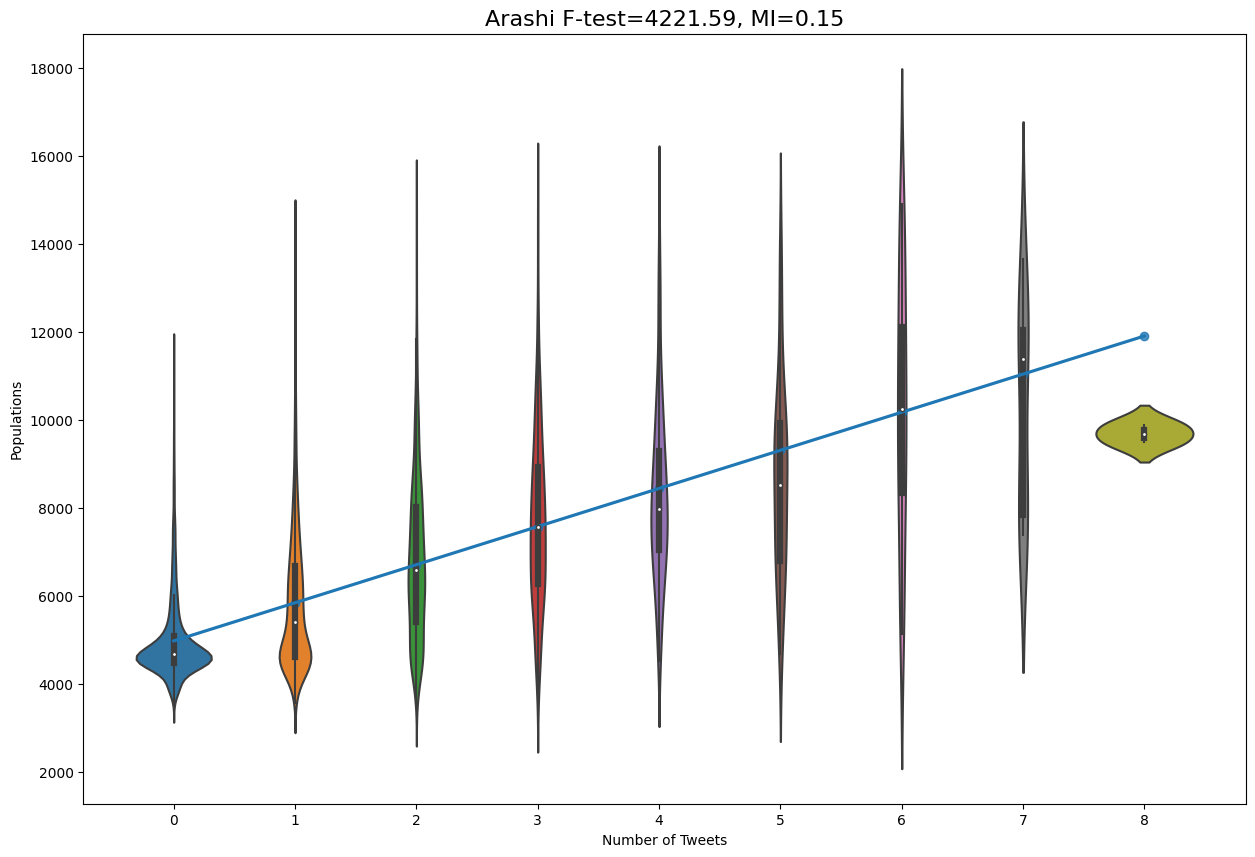

In [ ]:
X = mobile_flatten.reshape(-1,1)
y = tweets_flatten.reshape(-1,1)
a, b = np.polyfit(X[:,0], y, 1)
mi = mutual_info_regression(X, y)
f_test, _ = f_regression(X, y)
#フィッティング直線

plt.figure(figsize=(15, 10))
sns.violinplot(x='tweets_num', y='mobile', data = df)
sns.regplot(x='Tweets_num', y='population', data=data)
plt.xticks(ticks_l, ticks_r)
plt.xlabel('Number of Tweets')
plt.ylabel('Populations')
plt.title("Arashi F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)